<a href="https://colab.research.google.com/github/Assurance-Project-secure-road/analyse/blob/main/Assurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
vehicules = pd.read_csv("vehicules-2019.csv", delimiter=";")
vehicules

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,201900000001,138 306 524,B01,2,7,0,2,5,23,1,NaN
1,201900000001,138 306 525,A01,2,17,1,0,3,11,1,NaN
2,201900000002,138 306 523,A01,1,7,4,0,1,0,1,NaN
3,201900000003,138 306 520,A01,1,7,0,2,1,2,1,NaN
4,201900000003,138 306 521,B01,1,7,1,0,4,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
100705,201900058837,137 982 135,C01,1,7,0,2,1,2,1,NaN
100706,201900058838,137 982 132,A01,2,7,3,0,1,21,0,NaN
100707,201900058839,137 982 131,A01,2,33,0,0,7,1,1,NaN
100708,201900058840,137 982 129,B01,1,10,0,2,4,0,2,NaN


In [4]:
vehicules.describe()

,Num_Acc,senc,catv,obs,obsm,choc,manv,motor,occutc
count,1.007100e+05,100710.000000,100710.000000,100710.000000,100710.000000,100710.000000,100710.000000,100710.000000,892.000000
mean,2.019000e+11,1.557075,12.632817,0.990646,1.627098,2.926045,7.267401,1.171353,1.818386
std,1.697432e+04,0.833885,12.800755,3.088678,1.120068,2.421520,8.077319,1.112887,2.858931
min,2.019000e+11,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.019000e+11,1.000000,7.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.019000e+11,1.000000,7.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000
75%,2.019000e+11,2.000000,10.000000,0.000000,2.000000,4.000000,15.000000,1.000000,1.000000
max,2.019001e+11,3.000000,99.000000,17.000000,9.000000,9.000000,26.000000,6.000000,33.000000


In [77]:
vehicules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100710 entries, 0 to 100709
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      100710 non-null  int64  
 1   id_vehicule  100710 non-null  object 
 2   num_veh      100710 non-null  object 
 3   senc         100710 non-null  int64  
 4   catv         100710 non-null  int64  
 5   obs          100710 non-null  int64  
 6   obsm         100710 non-null  int64  
 7   choc         100710 non-null  int64  
 8   manv         100710 non-null  int64  
 9   motor        100710 non-null  int64  
 10  occutc       892 non-null     float64
dtypes: float64(1), int64(8), object(2)
memory usage: 8.5+ MB


# col occutc (Nombre d’occupants dans le transport en commun) 892 enregistrements dans le transport en commun 
# -> le pluspart d'accident arrivent av d'autre type de transport

In [5]:
# remplace valeur -1 par NaN
vehicules = vehicules.replace(-1,np.nan)

In [6]:
# choisir des cols à convertir de type de donnees
list_col = vehicules.columns[3:-1]
list_col

Index(['senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor'], dtype='object')

In [7]:
# convertir le type par Int64
for col in list_col:
    vehicules[col] = vehicules[col].astype("Int64")

# Analyser des donnees

In [79]:
vehicules.isna().value_counts()

Num_Acc  id_vehicule  num_veh  senc   catv   obs    obsm   choc   manv   motor  occutc
False    False        False    False  False  False  False  False  False  False  True      99446
                                                                                False       890
                                                                         True   True        273
                                                    True   False  False  False  True         37
                               True   False  True   True   True   True   True   True         28
                                             False  False  False  False  False  True          4
                               False  False  False  False  True   False  True   True          3
                                             True   True   True   False  True   True          3
                                             False  False  False  True   True   True          2
                                                 

In [57]:
vehicules["catv"].value_counts().sort_index()
#60% nb d'accidents sont des véhicules légères (voitures) - val = 7
# Indeterminable = 0 --> enlever ???? 

0       309
1      5000
2      3716
3       856
7     60787
10     6608
13      405
14      752
15      978
16       39
17      835
20      175
21      250
30     2990
31     1898
32     2399
33     8205
34     1325
35       21
36      150
37      717
38      175
39       32
40      116
41       12
42       35
43      460
50      636
60      141
80      253
99      435
Name: catv, dtype: int64

# enlever les vehicules qui ne sont pas déterminés leur type  (catv=0)

In [58]:
#vehicules = vehicules[vehicules["catv"]!=0]

In [74]:
vehicules.shape

(100401, 11)

In [51]:
#vehicules = vehicules.dropna()

# verifier col occutc correspondant du transport commun av col catv (type de vehicule)

In [60]:
vehicules_commun = vehicules["catv"][(vehicules["catv"] >= 37) & (vehicules["catv"] <= 40)]
vehicules_commun.value_counts()

37    717
38    175
40    116
39     32
Name: catv, dtype: int64

In [73]:
vehicules_avec_occupant = vehicules[vehicules["occutc"]>=0]
vehicules_avec_occupant["catv"].value_counts()

#Les accidents de train et tramway ne sont pas engeristrés les nb occupants

37    717
38    175
Name: catv, dtype: int64

In [26]:
vehicules["obs"].value_counts().sort_index()

0.0     86334
1.0      2314
2.0      1483
3.0      1419
4.0      1376
5.0       163
6.0      1119
7.0       304
8.0      1094
9.0       395
10.0      108
11.0      213
12.0      735
13.0     1744
14.0      798
15.0      537
16.0      399
17.0      134
Name: obs, dtype: int64

In [25]:
vehicules["obsm"].value_counts().sort_index()

0.0    18220
1.0    10380
2.0    70290
4.0       71
5.0       61
6.0      712
9.0      902
Name: obsm, dtype: int64

In [20]:
vehicules["manv"].value_counts().sort_index()

0.0      5947
1.0     40258
2.0     11792
3.0      1166
4.0       481
5.0      1117
6.0       141
7.0       255
8.0        43
9.0      3003
10.0      756
11.0     1201
12.0     1163
13.0     4518
14.0     2029
15.0     8190
16.0     2546
17.0     3598
18.0      550
19.0     2493
20.0      581
21.0     1524
22.0      317
23.0     2763
24.0      393
25.0      238
26.0     3603
Name: manv, dtype: int64

# Type de motorisation du véhicule
- 11.17% de vehicules ne sont pas déterminés leurs types de motorisation 
- 1.45% sont type d'AUTRE 

In [21]:
vehicules["motor"].value_counts().sort_index()

0.0    11215
1.0    80905
2.0      749
3.0     1536
4.0       64
5.0     4464
6.0     1451
Name: motor, dtype: int64

In [65]:
vehicules_motor_inconnu = vehicules["catv"][vehicules["motor"]==0]
vehicules_motor_inconnu.value_counts().sort_index()

1      525
2      400
3      227
7     6829
10     755
13      63
14      44
15      96
16       1
17      56
20      43
21      19
30     344
31     196
32     266
33     646
34     161
35       2
36      13
37     113
38      12
39       7
40      15
41       2
42       3
43      14
50       6
60       7
80       2
99     133
Name: catv, dtype: int64

# Point de choc initial


In [22]:
vehicules["choc"].value_counts().sort_index()

0.0     6038
1.0    36013
2.0    12216
3.0    15028
4.0    10298
5.0     2947
6.0     3612
7.0     5945
8.0     7128
9.0     1440
Name: choc, dtype: int64

In [72]:
vehicules.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100401 entries, 0 to 100709
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      100401 non-null  int64  
 1   id_vehicule  100401 non-null  object 
 2   num_veh      100401 non-null  object 
 3   senc         100367 non-null  float64
 4   catv         100401 non-null  int64  
 5   obs          100369 non-null  float64
 6   obsm         100339 non-null  float64
 7   choc         100367 non-null  float64
 8   manv         100368 non-null  float64
 9   motor        100116 non-null  float64
 10  occutc       892 non-null     float64
dtypes: float64(7), int64(2), object(2)
memory usage: 11.2+ MB


In [14]:
vehicules

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,201900000001,138 306 524,B01,2,7,0,2,5,23,1,NaN
1,201900000001,138 306 525,A01,2,17,1,0,3,11,1,NaN
2,201900000002,138 306 523,A01,1,7,4,0,1,0,1,NaN
3,201900000003,138 306 520,A01,1,7,0,2,1,2,1,NaN
4,201900000003,138 306 521,B01,1,7,1,0,4,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
100705,201900058837,137 982 135,C01,1,7,0,2,1,2,1,NaN
100706,201900058838,137 982 132,A01,2,7,3,0,1,21,0,NaN
100707,201900058839,137 982 131,A01,2,33,0,0,7,1,1,NaN
100708,201900058840,137 982 129,B01,1,10,0,2,4,0,2,NaN


In [15]:
vehicules["senc"].value_counts()

1    44661
2    33543
3    15036
0     7428
Name: senc, dtype: Int64

In [20]:

df_pivot_cat_motor = vehicules[["catv", "motor", "id_vehicule"]].copy()
pivot_cat_motor = pd.pivot_table(df_pivot_cat_motor,index=["catv"], columns=["motor"], values=["id_vehicule"], aggfunc='count')
pivot_cat_motor

id_vehicule                                            
motor           0        1      2      3     4       5      6
catv                                                         
0           215.0     33.0    NaN    5.0   NaN     8.0    7.0
1           525.0     11.0   12.0    NaN   NaN  4266.0  169.0
2           400.0   3203.0    2.0   36.0   2.0     1.0   66.0
3           227.0    589.0    6.0    6.0   NaN     NaN   24.0
7          6829.0  52117.0  641.0  193.0  43.0    26.0  759.0
10          755.0   5681.0   12.0   44.0   5.0     1.0   87.0
13           63.0    322.0    2.0    3.0   NaN     NaN   14.0
14           44.0    682.0    NaN    NaN   4.0     NaN   20.0
15           96.0    862.0    NaN    NaN   1.0     NaN   17.0
16            1.0     38.0    NaN    NaN   NaN     NaN    NaN
17           56.0    765.0    NaN    NaN   NaN     NaN   14.0
20           43.0    124.0    NaN    4.0   NaN     NaN    3.0
21           19.0    228.0    NaN    NaN   NaN     NaN    3.0
30          344.0   2415.0    6.0  166.0   2.0     1.0   47.0
31          196.0   1671.0    1.0    4.0   NaN     1.0   25.0
32          266.0   2079.0    NaN   17.0   1.0     NaN   30.0
33          646.0   7440.0    5.0   11.0   NaN     2.0   88.0
34          161.0   1131.0    1.0   13.0   NaN     NaN   17.0
35            2.0     18.0    NaN    NaN   NaN     NaN    1.0
36           13.0    133.0    NaN    2.0   NaN     NaN    2.0
37          113.0    521.0   34.0   15.0   5.0     NaN   27.0
38           12.0    161.0    NaN    1.0   1.0     NaN    NaN
39            7.0      6.0    1.0   16.0   NaN     NaN    NaN
40           15.0      1.0    1.0   97.0   NaN     NaN    2.0
41            2.0      9.0    NaN    1.0   NaN     NaN    NaN
42            3.0     31.0    NaN    NaN   NaN     NaN    1.0
43           14.0    444.0    NaN    1.0   NaN     NaN    NaN
50            6.0      1.0    NaN  629.0   NaN     NaN    NaN
60            7.0      NaN    NaN    NaN   NaN   131.0    2.0
80            2.0      NaN   23.0  224.0   NaN     3.0    NaN
99          133.0    189.0    2.0   48.0   NaN    24.0   26.0

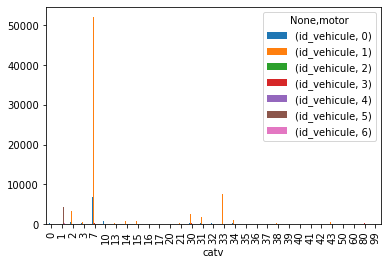

In [22]:
# val_motor={0: "Inconnue", 1: "Hydrocarbures", 2: "Hybride électrique", 3: "Electrique", 4: "Hydrogène", 5: "Humaine", 6: "Autre"}
pivot_cat_motor.plot(kind='bar');

# Analyse s/ Voiture seul, voiture av caraval et remorque

In [39]:
df_pivot_vehicule_seul = vehicules[["catv", "manv", "id_vehicule"]][vehicules["catv"]==7].copy()
pivot_vehicule_seul = pd.pivot_table(df_pivot_vehicule_seul,index=["manv", "catv"], values=["id_vehicule"], aggfunc='count')
pivot_vehicule_seul

,,id_vehicule
manv,catv,
0,7,3481
1,7,23012
2,7,7851
3,7,65
4,7,312
5,7,595
6,7,85
7,7,52
8,7,8


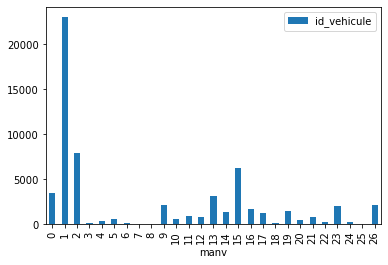

In [32]:
pivot_vehicule_seul.plot(kind='bar');

#Manoeuvre principale avant l’accident sont 
# 0 (inconnu)
# 1 (Sans changement de direction), 2 (Même sens, même file) et 15 (tourner A gauche)
# 13 (dévier/déporter à gauche)

# sur les vehicules 2 roues (motocyclette, scooter)

In [45]:
df_pivot_scooter_motor = vehicules[["catv", "manv", "id_vehicule"]][(vehicules["catv"]>=30)&(vehicules["catv"]<=34)].copy()
pivot_scooter_motor = pd.pivot_table(df_pivot_scooter_motor,index=["manv"], columns=["catv"], values=["id_vehicule"], aggfunc='count')
pivot_scooter_motor

id_vehicule                              
catv          30     31      32      33     34
manv                                          
0          190.0   96.0   128.0   442.0   82.0
1         1188.0  856.0  1067.0  3818.0  539.0
2          242.0  149.0   189.0   677.0  121.0
3           32.0  120.0   129.0   615.0   78.0
4            NaN    NaN     1.0     2.0    NaN
5           63.0   19.0    23.0    71.0    7.0
6            2.0    4.0     2.0     7.0    NaN
7           31.0   13.0    17.0    22.0   10.0
8            3.0    1.0     6.0     4.0    2.0
9           82.0   34.0    36.0    92.0   28.0
10          11.0    5.0     2.0    12.0    1.0
11          18.0   18.0    25.0    55.0   15.0
12           4.0    9.0    19.0    62.0   13.0
13         120.0   49.0    72.0   306.0   29.0
14          73.0   35.0    38.0   134.0   20.0
15         127.0   59.0    59.0   167.0   28.0
16          70.0   33.0    48.0   119.0   18.0
17         282.0  206.0   241.0   858.0  153.0
18          88.0   29.0    58.0    80.0   45.0
19          58.0   14.0    25.0    42.0   15.0
20           2.0    2.0     5.0    10.0    NaN
21          75.0   53.0    60.0   217.0   41.0
22           2.0    NaN     NaN     NaN    NaN
23          16.0   21.0    41.0   110.0   18.0
24           NaN    NaN     NaN     8.0    NaN
25          27.0    6.0    15.0     3.0    2.0
26         182.0   67.0    91.0   270.0   60.0

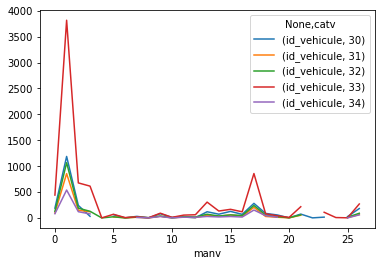

In [46]:
pivot_scooter_motor.plot();

Les Motocyclettes ont plus d'accident que les autres de 2 roues 